# Analyzing CIA Factbook Data Using SQLite and Python

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")

In [2]:
q1 = "SELECT * FROM sqlite_master WHERE type='table'"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [3]:
q2 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [4]:
q3 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [5]:
q4 = "SELECT name, population FROM facts WHERE population == (SELECT MIN(population) FROM facts)"
pd.read_sql_query(q4, conn)

,name,population
0,Antarctica,0


In [6]:
q5 = "SELECT name, population FROM facts WHERE population == (SELECT MAX(population) FROM facts)"
pd.read_sql_query(q5, conn)

,name,population
0,World,7256490011


Above, we observed that the minimum population for a country in our dataset is 0, and the maximum population for a country is greater than 7.2 billion. This is because Antarctica and World are both included as countries in our dataset. We will ignore these rows in our analysis.

Next, let's generate histograms of the population, population growth, birth rate, and death rate for all of the countries in our dataset.

In [7]:
q6 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population BETWEEN 1 AND 7000000000"
df_pop = pd.read_sql_query(q6, conn)

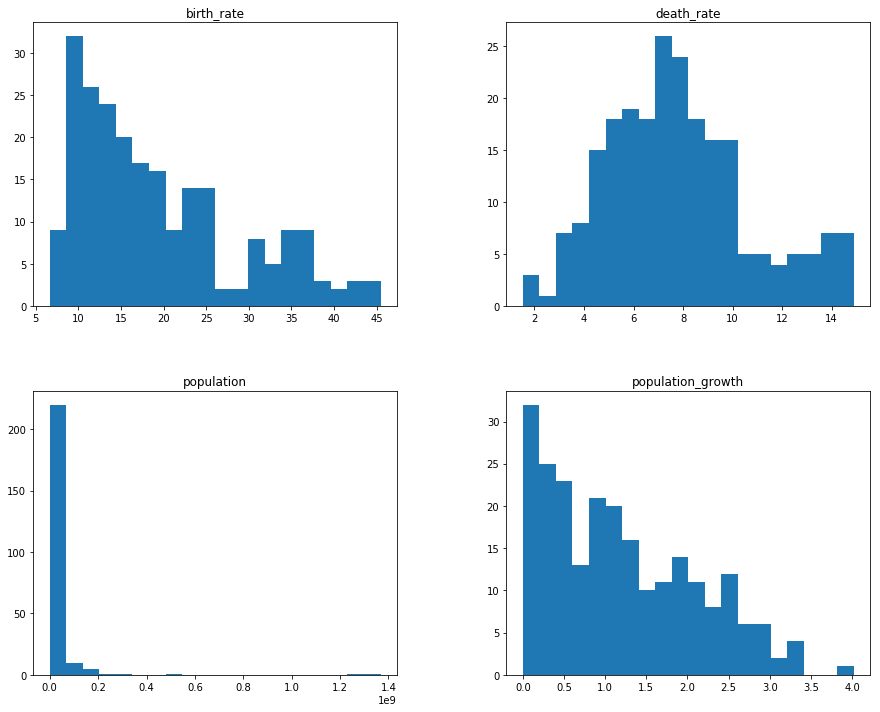

In [13]:
import matplotlib.pyplot as plt

df_pop.hist(figsize=(15,12), bins=20, grid=False)
plt.show()

Now, let's identify the countries with the highest and lowest population density, and generate a histogram of population densities.

In [9]:
q7 = "SELECT name, population, area_land, ROUND(population/CAST(area_land as Float), 2) population_density FROM facts WHERE (population BETWEEN 1 AND 7000000000) AND area_land IS NOT NULL ORDER BY population_density"
df_density = pd.read_sql_query(q7, conn)

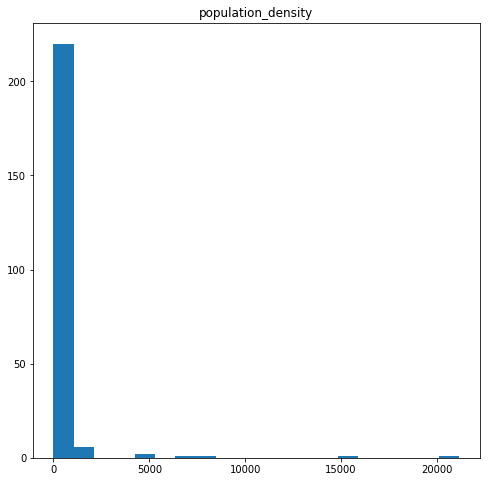

In [10]:
df_density.hist(column='population_density', figsize=(8,8), grid=False, bins=20)
plt.show()

In [11]:
df_density.head(10)

,name,population,area_land,population_density
0,Holy See (Vatican City),842,0,NaN
1,Greenland,57733,2166086,0.03
2,Svalbard,1872,62045,0.03
3,Falkland Islands (Islas Malvinas),3361,12173,0.28
4,Pitcairn Islands,48,47,1.02
5,Mongolia,2992908,1553556,1.93
6,Western Sahara,570866,266000,2.15
7,Namibia,2212307,823290,2.69
8,Australia,22751014,7682300,2.96
9,Iceland,331918,100250,3.31


In [12]:
df_density.tail(10)

,name,population,area_land,population_density
223,Bermuda,70196,54,1299.93
224,Malta,413965,316,1310.02
225,Maldives,393253,298,1319.64
226,Bahrain,1346613,760,1771.86
227,Gibraltar,29258,6,4876.33
228,Gaza Strip,1869055,360,5191.82
229,Hong Kong,7141106,1073,6655.27
230,Singapore,5674472,687,8259.78
231,Monaco,30535,2,15267.50
232,Macau,592731,28,21168.96


As shown in the above tables, Greenland is the least densely popluated country in our dataset, and Macau is the most densely populated country in our dataset.